In [1]:
!pip install opendatasets

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/playground-series-s5e6/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pagidipallyajaykumar
Your Kaggle Key: ··········


100%|██████████| 11.7M/11.7M [00:00<00:00, 809MB/s]


Extracting archive ./playground-series-s5e6/playground-series-s5e6.zip to ./playground-series-s5e6


In [4]:
df_train = pd.read_csv('/content/playground-series-s5e6/train.csv')
df_test = pd.read_csv('/content/playground-series-s5e6/test.csv')

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [6]:
sample = pd.read_csv('/content/playground-series-s5e6/sample_submission.csv')
sample.head()

,id,Fertilizer Name
0,750000,14-35-14 10-26-26 Urea
1,750001,14-35-14 10-26-26 Urea
2,750002,14-35-14 10-26-26 Urea
3,750003,14-35-14 10-26-26 Urea
4,750004,14-35-14 10-26-26 Urea


In [7]:
sample['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
14-35-14 10-26-26 Urea,250000


In [8]:
df = df_train.copy()
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [9]:
df.index = df.id

In [10]:
df['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
14-35-14,114436
10-26-26,113887
17-17-17,112453
28-28,111158
20-20,110889
DAP,94860
Urea,92317


In [11]:
df.drop(["id"],axis=1).describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [12]:
df.isnull().sum()

,0
id,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 62.9+ MB


In [14]:
features = [col for col in df.drop(['id','Soil Type','Crop Type','Fertilizer Name'],axis=1)]
features

['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

In [15]:
df[features].corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.001758,-0.001633,-0.006073,-0.009913,0.000298
Humidity,0.001758,1.000000,0.003424,0.006502,0.005229,0.002413
Moisture,-0.001633,0.003424,1.000000,0.003016,-0.001931,-0.006735
Nitrogen,-0.006073,0.006502,0.003016,1.000000,0.000543,-0.005464
Potassium,-0.009913,0.005229,-0.001931,0.000543,1.000000,0.000113
Phosphorous,0.000298,0.002413,-0.006735,-0.005464,0.000113,1.000000


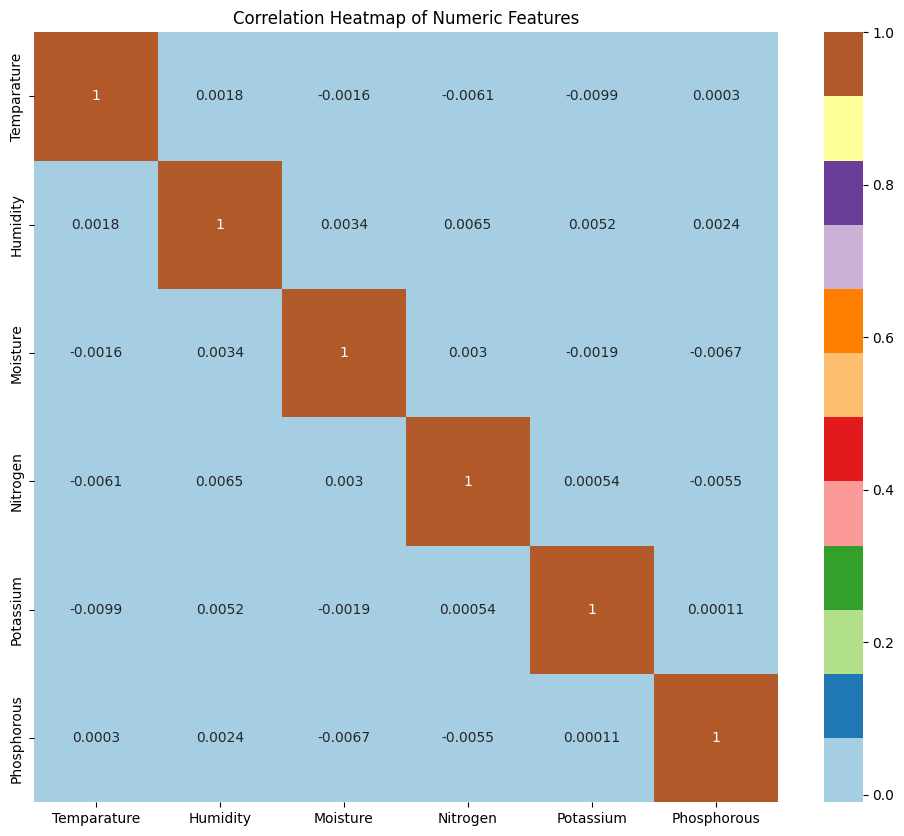

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[features].corr(), cmap='Paired', annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

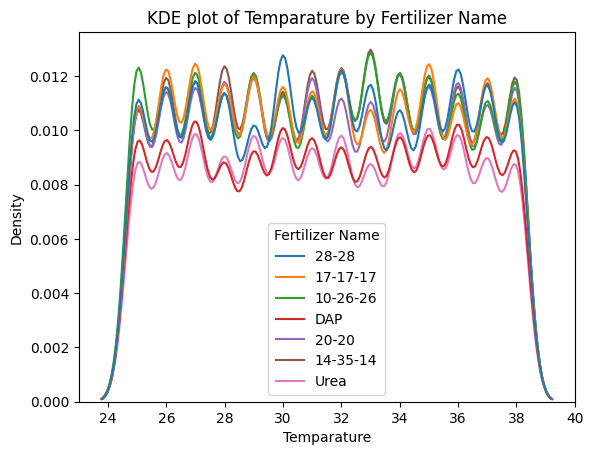

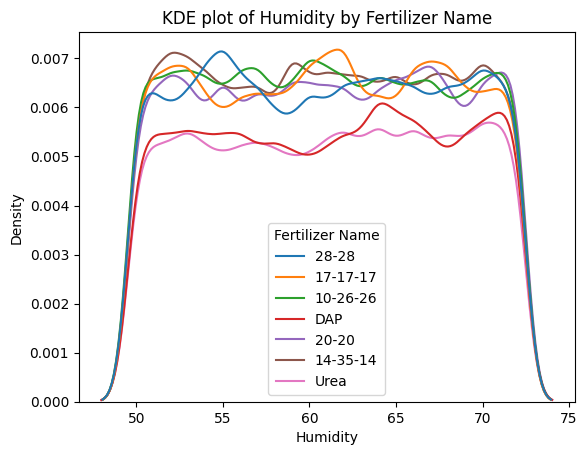

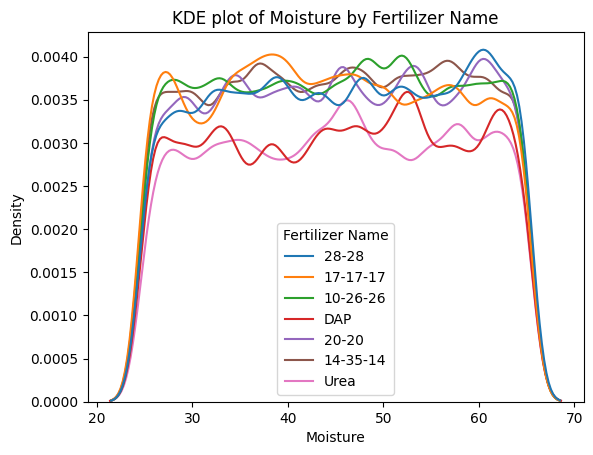

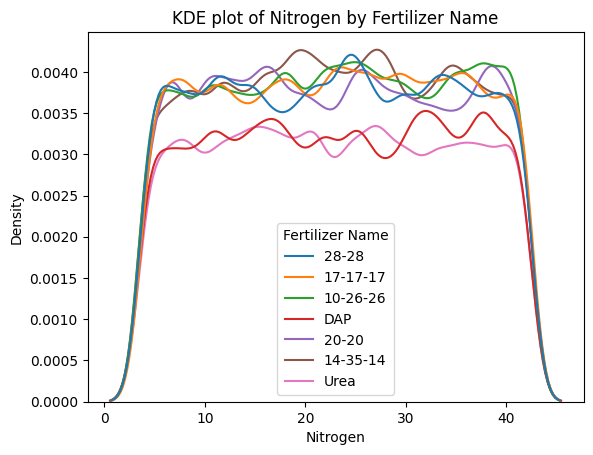

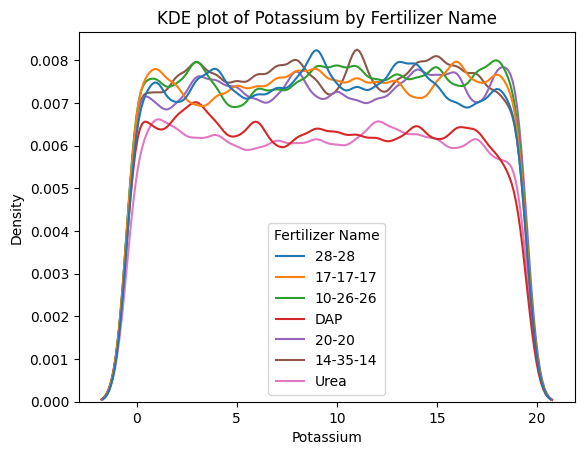

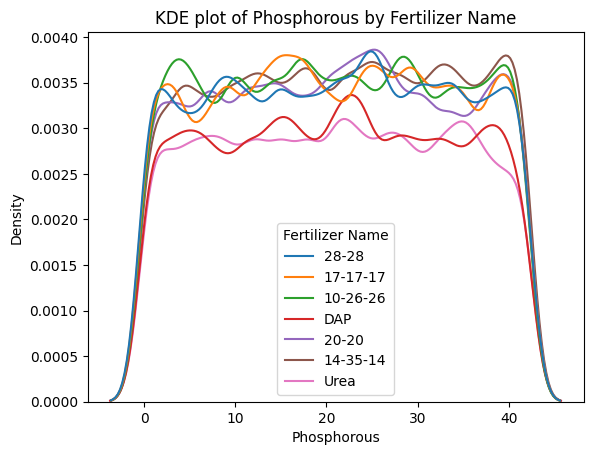

In [17]:
for i, predictor in enumerate(features):
    sns.kdeplot(data=df, x=predictor, hue='Fertilizer Name')
    plt.title(f'KDE plot of {predictor} by Fertilizer Name')
    plt.xlabel(predictor)
    plt.ylabel('Density')
    plt.show()

In [18]:
df['Soil Type'].value_counts()

,count
Soil Type,
Sandy,156710
Black,150956
Clayey,148382
Red,148102
Loamy,145850


In [19]:
pd.crosstab(df['Soil Type'],df['Fertilizer Name'])

Fertilizer Name,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
Soil Type,,,,,,,
Black,23061,23656,22304,21721,21196,20501,18517
Clayey,23592,22258,22771,22508,22762,17278,17213
Loamy,22822,22571,22249,22138,21522,17476,17072
Red,21725,22779,22141,21614,21679,19077,19087
Sandy,22687,23172,22988,22908,23999,20528,20428


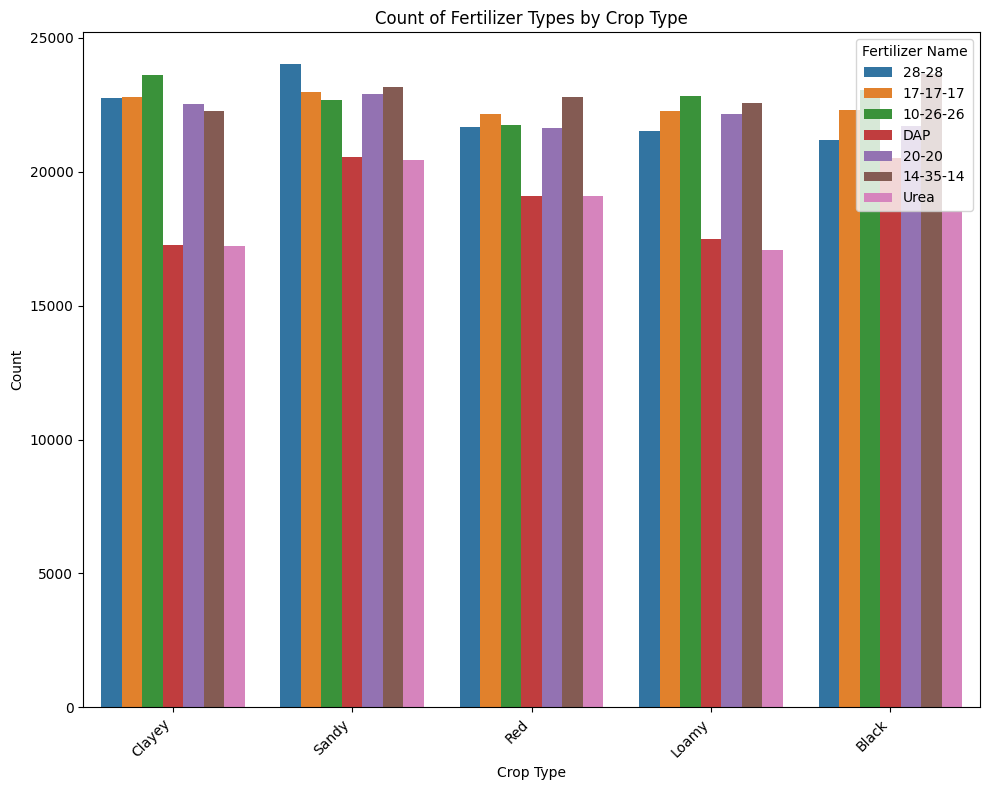

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Soil Type',hue='Fertilizer Name')
plt.title('Count of Fertilizer Types by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
df_soil_fertilizer = pd.DataFrame(pd.crosstab(df['Soil Type'],df['Fertilizer Name'])).reset_index()
df_soil_fertilizer.columns.name = None
df_soil_fertilizer

,Soil Type,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
0,Black,23061,23656,22304,21721,21196,20501,18517
1,Clayey,23592,22258,22771,22508,22762,17278,17213
2,Loamy,22822,22571,22249,22138,21522,17476,17072
3,Red,21725,22779,22141,21614,21679,19077,19087
4,Sandy,22687,23172,22988,22908,23999,20528,20428


In [22]:
fertilizer_list1 = set()
for index, row in df_soil_fertilizer.iterrows():
    soil_type = row['Soil Type']
    max_fertilizer = row.drop('Soil Type').idxmax()

    # fertilizer_list2.append({'Crop Type': crop_type, 'Max Fertilizer': max_fertilizer})
    fertilizer_list1.add(max_fertilizer)

# Convert the list of dictionaries to a DataFrame for better visualization
# fertilizer_recommendations = pd.DataFrame(fertilizer_list2)
fertilizer_list_soil = list(fertilizer_list1)
print(list(fertilizer_list1))

['10-26-26', '14-35-14', '28-28']


In [23]:
df['Crop Type'].value_counts().sort_values(ascending=True)

,count
Crop Type,
Ground Nuts,60909
Maize,62569
Oil seeds,64184
Sugarcane,64269
Barley,65045
Millets,65291
Wheat,66628
Tobacco,68000
Cotton,69171


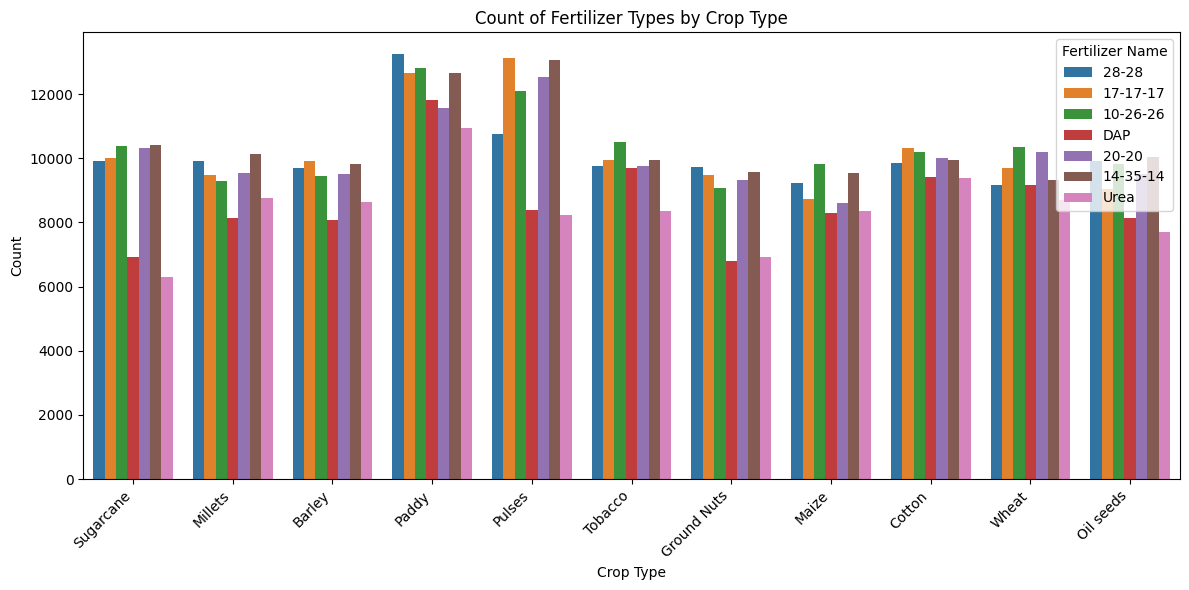

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Crop Type', hue='Fertilizer Name')
plt.title('Count of Fertilizer Types by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
df_crop_fertilizer = pd.DataFrame(pd.crosstab(df['Crop Type'],df['Fertilizer Name'])).reset_index()
df_crop_fertilizer.columns.name = None
df_crop_fertilizer

,Crop Type,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
0,Barley,9447,9809,9901,9500,9684,8068,8636
1,Cotton,10204,9953,10337,10013,9862,9427,9375
2,Ground Nuts,9087,9582,9468,9322,9715,6802,6933
3,Maize,9821,9546,8722,8615,9232,8289,8344
4,Millets,9300,10121,9494,9541,9916,8148,8771
5,Oil seeds,9838,10038,9058,9502,9902,8153,7693
6,Paddy,12812,12651,12661,11580,13264,11828,10958
7,Pulses,12090,13064,13138,12530,10761,8375,8222
8,Sugarcane,10399,10410,10003,10331,9902,6910,6314
9,Tobacco,10522,9952,9959,9747,9764,9694,8362


In [26]:
fertilizer_list2 = set()
for index, row in df_crop_fertilizer.iterrows():
    crop_type = row['Crop Type']
    max_fertilizer = row.drop('Crop Type').idxmax()

    # fertilizer_list2.append({'Crop Type': crop_type, 'Max Fertilizer': max_fertilizer})
    fertilizer_list2.add(max_fertilizer)

# Convert the list of dictionaries to a DataFrame for better visualization
# fertilizer_recommendations = pd.DataFrame(fertilizer_list2)
fertilizer_list_crop = list(fertilizer_list2)
print(list(fertilizer_list2))

['10-26-26', '28-28', '14-35-14', '17-17-17']


In [27]:
fertilizer_list_soil

['10-26-26', '14-35-14', '28-28']

In [28]:
fertilizer_list_crop

['10-26-26', '28-28', '14-35-14', '17-17-17']

In [29]:
f_list = np.union1d(fertilizer_list_soil,fertilizer_list_crop)
f_list = f_list[:-1]
f_list

array(['10-26-26', '14-35-14', '17-17-17'], dtype='<U8')

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [31]:
# submission_df = pd.DataFrame({'id': df_test['id'], 'Fertilizer Name': f'{f_list[0]} {f_list[1]} {f_list[2]}'})

In [32]:
# submission_df.info()

In [33]:
# submission_df.to_csv('submission.csv', index=False)

# Feature Scaling

In [34]:
df

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,,
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 62.9+ MB


In [36]:
df['Soil Type'].value_counts()

,count
Soil Type,
Sandy,156710
Black,150956
Clayey,148382
Red,148102
Loamy,145850


In [37]:
df['Crop Type'].value_counts()

,count
Crop Type,
Paddy,85754
Pulses,78180
Cotton,69171
Tobacco,68000
Wheat,66628
Millets,65291
Barley,65045
Sugarcane,64269
Oil seeds,64184


In [38]:
dfe = pd.get_dummies(df,columns=['Crop Type','Soil Type'],dtype=int)
dfe

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop Type_Barley,Crop Type_Cotton,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
id,,,,,,,,,,,,,,,,,,,,,
0,0,37,70,36,36,4,5,28-28,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,27,69,65,30,6,18,28-28,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,29,63,32,24,12,16,17-17-17,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,35,62,54,39,12,4,10-26-26,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,35,58,43,37,2,16,DAP,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,8,16,6,28-28,0,0,...,0,0,0,0,0,0,1,0,0,0
749996,749996,37,64,58,38,8,20,17-17-17,0,0,...,0,0,1,0,0,0,0,1,0,0
749997,749997,35,68,59,6,11,29,10-26-26,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
dfe['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
14-35-14,114436
10-26-26,113887
17-17-17,112453
28-28,111158
20-20,110889
DAP,94860
Urea,92317


In [40]:
dfe['Fertilizer Name']=dfe['Fertilizer Name'].map({'14-35-14':0,'10-26-26':1,'17-17-17':2,'28-28':3,'20-20':4,'DAP':5,'Urea':6})

In [41]:
dfe

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop Type_Barley,Crop Type_Cotton,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
id,,,,,,,,,,,,,,,,,,,,,
0,0,37,70,36,36,4,5,3,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,27,69,65,30,6,18,3,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,29,63,32,24,12,16,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,35,62,54,39,12,4,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,35,58,43,37,2,16,5,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,8,16,6,3,0,0,...,0,0,0,0,0,0,1,0,0,0
749996,749996,37,64,58,38,8,20,2,0,0,...,0,0,1,0,0,0,0,1,0,0
749997,749997,35,68,59,6,11,29,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
dfe['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
0,114436
1,113887
2,112453
3,111158
4,110889
5,94860
6,92317


In [43]:
dfe = dfe.drop(['id'],axis=1)

In [44]:
dfe

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
id,,,,,,,,,,,,,,,,,,,,,
0,37,70,36,36,4,5,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,27,69,65,30,6,18,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,29,63,32,24,12,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35,62,54,39,12,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,58,43,37,2,16,5,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,25,69,30,8,16,6,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
749996,37,64,58,38,8,20,2,0,0,0,...,0,0,1,0,0,0,0,1,0,0
749997,35,68,59,6,11,29,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df_test = pd.get_dummies(df_test,columns=['Crop Type','Soil Type'],dtype=int)

In [46]:
# df_test['Fertilizer Name']=df_test['Fertilizer Name'].map({'14-35-14':0,'10-26-26':1,'17-17-17':2,'28-28':3,'20-20':4,'DAP':5,'Urea':6})

In [47]:
df_test

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
0,750000,31,70,52,34,11,24,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,750001,27,62,45,30,14,15,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,750002,28,72,28,14,15,4,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,750003,37,53,57,18,17,36,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,750004,31,55,32,13,19,14,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,14,7,18,0,0,0,...,0,0,1,0,0,0,0,0,1,0
249996,999996,33,62,55,28,14,7,0,0,0,...,0,1,0,0,0,0,0,0,1,0
249997,999997,36,53,64,28,11,27,0,0,0,...,1,0,0,0,0,1,0,0,0,0
249998,999998,36,67,26,33,0,10,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [48]:
X_train = dfe.drop(['Fertilizer Name'],axis=1)
y_train = dfe['Fertilizer Name']

In [49]:
X_test = df_test.drop(['id'],axis=1)
# y_test = df_test['Fertilizer Name']

In [50]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [52]:
print(X_train.shape,X_test.shape,y_train.shape)

(750000, 22) (250000, 22) (750000,)


In [53]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# # from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# lr = LinearRegression()
# clf = lr.fit(X_train,y_train)


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# grid={'C':10.0 ** np.arange(-3,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [56]:
# adding n_estimators and max_depth
grid={'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}

In [57]:
clf =GridSearchCV(xgb,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [59]:
model = clf.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'xgboost_model.pkl')

In [ ]:
y_pred = model.predict_proba(X_test)
# print('mean_squared_error: ',mean_squared_error(y_test,y_pred))

In [ ]:
y_pred

In [ ]:
top_3_indices = np.argsort(y_pred, axis=1)[:, :-4:-1]
print(top_3_indices)

In [ ]:
# Create a dictionary to map numerical labels back to fertilizer names
fertilizer_map = {0:'14-35-14', 1:'10-26-26', 2:'17-17-17', 3:'28-28', 4:'20-20', 5:'DAP', 6:'Urea'}

# Map the indices in top_3_indices to fertilizer names
top_3_fertilizers = [[fertilizer_map[i] for i in row] for row in top_3_indices]
print(top_3_fertilizers)

In [ ]:
submission_df = pd.DataFrame({'id': df_test['id'], 'Fertilizer Name': [' '.join(fertilizers) for fertilizers in top_3_fertilizers]})

In [ ]:
submission_df

In [ ]:
submission_df.info()

In [ ]:
submission_df.to_csv('submission.csv', index=False)